### prepare

In [1]:
# import
# pip3 install -U scikit-learn
# sudo pacman -S python-scikit-learn
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#from google.colab import files
import tensorflow as tf
import math

# data
x_data1 = np.array([ [ 1,0 ],[ 1,1 ],[ 1,2 ],[ 1,3 ],[ 1,4 ],[ 1,5 ] ])
y_data1 = np.array([ [ 0,10 ],[ 1,11 ],[ 2,12 ],[ 3,13 ],[ 4,14 ],[ 5,15 ] ])

x_data2 = np.array([ [ 2,0 ],[ 2,1 ],[ 2,2 ],[ 2,3 ],[ 2,4 ],[ 2,5 ] ])
y_data2 = np.array([ [ 1,11 ],[ 2,12 ],[ 3,13 ],[ 4,14 ],[ 5,15 ],[ 6,16 ] ])

# construct
x_data = x_data1; y_data = y_data1
x_data = np.append(x_data,x_data2,axis=0); y_data = np.append(y_data,y_data2,axis=0)

# test
x_dataT = np.array([ [ 1.5,0 ],[ 1.5,1 ],[ 1.5,2 ],[ 1.5,3 ],[ 1.5,4 ],[ 1.5,5 ] ])
x_data = np.append(x_data,x_dataT,axis=0)

In [2]:
#x_data[:,[1]] # x_data[:,[1]], x_data[:]

In [3]:
#y_data[:,[1]] # y_data[:,[1]], y_data[:]

In [4]:
# non-dimensionalize
x_data = MinMaxScaler().fit_transform(x_data)
y_data = MinMaxScaler().fit_transform(y_data)

# shape
print("x shape is ", x_data.shape)
print("y shape is ", y_data.shape)

x shape is  (18, 2)
y shape is  (12, 2)


In [5]:
x_data[:] # x_data[:,[1]], x_data[:]

array([[0. , 0. ],
       [0. , 0.2],
       [0. , 0.4],
       [0. , 0.6],
       [0. , 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0.2],
       [1. , 0.4],
       [1. , 0.6],
       [1. , 0.8],
       [1. , 1. ],
       [0.5, 0. ],
       [0.5, 0.2],
       [0.5, 0.4],
       [0.5, 0.6],
       [0.5, 0.8],
       [0.5, 1. ]])

In [6]:
#y_data[:] # y_data[:,[1]], y_data[:]

In [7]:
# retrieve
l1=len(x_data1);l2=len(x_data2)
lT=len(x_dataT) # test
x_data1n = x_data[0:l1]
x_data2n = x_data[l1:l1+l2]
x_dataTn = x_data[l1+l2:l1+l2+lT] # test

In [8]:
#x_data1n[:]

In [9]:
#x_data2n[:]

In [10]:
#x_data6n[:]

In [11]:
# remove test from non-dimensionalize

x_data = x_data[:l1+l2]

# shape
print("x shape is ", x_data.shape)
print("y shape is ", y_data.shape)

x shape is  (12, 2)
y shape is  (12, 2)


### show

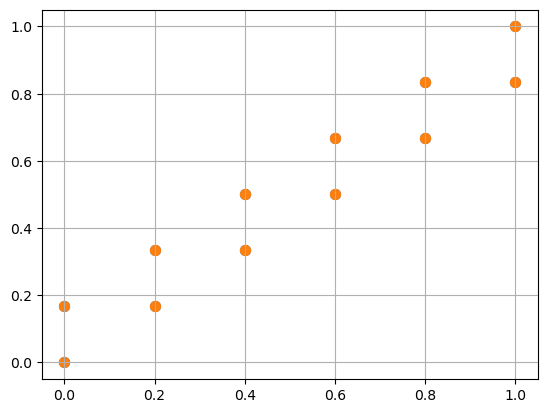

<Figure size 640x480 with 0 Axes>

In [12]:
# plot
plt.scatter(x_data[::,[1]], y_data[::,[0]], s=50)
plt.scatter(x_data[::,[1]], y_data[::,[1]], s=50)
plt.grid()
plt.show()
plt.savefig('dataset.png',dpi=300)
#files.download('dataset.png') 

### model

In [13]:
# 2^n,relu,adam,mse

# input layer
n_features = x_data.shape[1]
inputs  = keras.Input(shape=(n_features,))

dense   = keras.layers.Dense(1024, activation="relu")

x       = dense(inputs)
x       = keras.layers.Dense(512, activation="relu")(x)
x       = keras.layers.Dense(256, activation="relu")(x)
x       = keras.layers.Dense(128, activation="relu")(x)
x       = keras.layers.Dense(64, activation="relu")(x)
x       = keras.layers.Dense(16, activation="relu")(x)

# output layer
n_qualities = y_data.shape[1]
outputs = keras.layers.Dense(n_qualities)(x)

#model = keras.Sequential()
#model.add(keras.layers.Dense(units=128,input_shape=(1,), activation='relu'))
#model.add(keras.layers.Dense(64, activation='relu'))
#model.add(keras.layers.Dense(32, activation='relu'))
#model.add(keras.layers.Dense(16, activation='relu'))
#model.add(keras.layers.Dense(1,))

# model
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')
#model.summary()

2022-08-23 16:40:22.315357: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-23 16:40:22.316687: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### train

In [14]:
# 10,64
model.fit(x_data, y_data, batch_size=64, epochs=300, verbose=0)

### predict

In [15]:
# from input
#y_predicted = model.predict(x_data)
y_predicted1n = model.predict(x_data1n)
y_predicted2n = model.predict(x_data2n)
y_predictedTn = model.predict(x_dataTn) # test

1/1 [==============================] - 0s 38ms/step


In [16]:
#x_data1n[:,[1]]

In [17]:
#y_predicted1n[:,[1]]

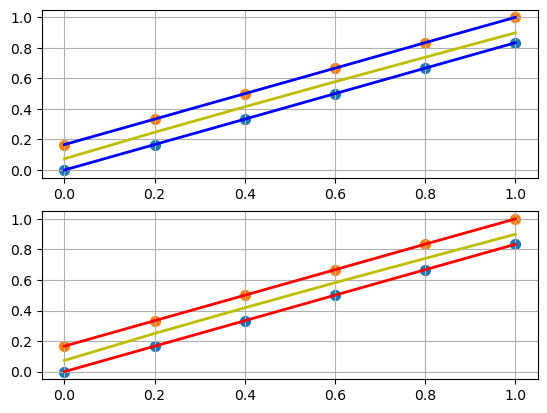

In [18]:
fig, (ax1, ax2) = plt.subplots(2,1)

# plot 1, 0: data set 1
#plt.scatter(x_data[:,[1]], y_data[:,[0]], s=50)
ax1.scatter(x_data1n[:,[1]], y_predicted1n[:,[0]], s=50)
ax1.plot( x_data1n[:,[1]], y_predicted1n[:,[0]], 'b', linewidth=2)
ax1.scatter(x_data2n[:,[1]], y_predicted2n[:,[0]], s=50)
ax1.plot( x_data2n[:,[1]], y_predicted2n[:,[0]], 'b', linewidth=2)
ax1.plot( x_dataTn[:,[1]], y_predictedTn[:,[0]], 'y', linewidth=2)
ax1.grid()

# plot 2, 1: data set 2
#plt.scatter(x_data[:,[1]], y_data[:,[1]], s=50)
ax2.scatter(x_data1n[:,[1]], y_predicted1n[:,[1]], s=50)
ax2.plot( x_data1n[:,[1]], y_predicted1n[:,[1]], 'r', linewidth=2)
ax2.scatter(x_data2n[:,[1]], y_predicted2n[:,[1]], s=50)
ax2.plot( x_data2n[:,[1]], y_predicted2n[:,[1]], 'r', linewidth=2)
ax2.plot( x_dataTn[:,[1]], y_predictedTn[:,[1]], 'y', linewidth=2)
ax2.grid()

#plt.show()
plt.savefig('training.png', dpi=300)
#files.download("training.png") 

### video


In [19]:
#for x in range(100):
#  # One epoch
#  model.fit( x_data, y_data, epochs=1, verbose=1)
#
#  # Compute the output 
#  y_predicted = model.predict(x_data)
#
#  # Display the result
#  plt.scatter(x_data[::1], y_data[::1], s=2)
#  plt.plot(x_data, y_predicted, 'r', linewidth=4)
#  plt.grid()
#  plt.ylim(top=1.2)  # adjust the top leaving bottom unchanged
#  plt.ylim(bottom=-1.2)  
#  #plt.show()
#  plt.savefig('training-' + str(x) +'-epochs.png',dpi=300)
#  #files.download('training-' + str(x) +'-epochs.png') 
#  plt.clf()

